## <font color=blue> Melanoma Image Classification using CNN </font> - by Sankalp Gupta

<font color=blue> Problem statement: </font> To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

<font color=blue> Instructions: </font>
- Importing Skin Cancer Data
- To do: Take necessary actions to read the data
- Importing all the important libraries

#### <font color=blue> Step 0: </font> Connect to the Github repository to access data files

In [ ]:
#This is required to clone the data files from github into google colab.
#This has to be executed everytime, as google colab runtime does not store data files, once the program session is removed
!git clone https://github.com/sagupta153/melanoma_identification

In [ ]:
#Verify the present working directory. This helps in setting the path for the image data files
!pwd

In [1]:
#This is the parent folder where the program and data files are stored. 
#parent_path = '/content/melanoma_identification'     #Use this when executing the program on google colab
parent_path = '.'                                   #Use this when executing the program on local PC

#### <font color=blue> Step 1: </font> Import necessary libraries

In [2]:
import os, pathlib, glob, shutil

import numpy as np, pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras

<font color=blue> Notes: </font>
- This assignment uses a dataset of about 2357 images of skin cancer types.
- The dataset contains 9 sub-directories in each train and test subdirectories.
- The 9 sub-directories contains the images of 9 skin cancer types respectively.

#### <font color=blue> Step 2: </font> Connect with the Image Data directory

In [3]:
#Set the path where the image data files will be found
data_path  = parent_path + '/melanomas'

train_path = data_path + '/Train'
test_path  = data_path + '/Test'

In [4]:
#This is just to ensure that the program does not crash in case the image files folder is not set properly
def crete_dir_if_not_existing (f):
    if not os.path.exists(f):
        print ('Dir ' + f + ' does not exist. Creating one')
        os.mkdir(f)
    else:
        print ('Dir ' + f + ' exists')

In [5]:
#Create directories if they do not exist - This is done to prevent the program from crashing
crete_dir_if_not_existing(data_path)
crete_dir_if_not_existing(train_path)
crete_dir_if_not_existing(test_path)

Dir ./melanomas exists
Dir ./melanomas/Train exists
Dir ./melanomas/Test exists


In [6]:
#Initialise the path class corresponding to the path-string for image data files
train_dir = pathlib.Path(train_path)
test_dir  = pathlib.Path(test_path)

In [7]:
#Count the number of image files
image_count_train = len(list(train_dir.glob('*/*.jpg')))
image_count_test  = len(list(test_dir.glob('*/*.jpg')))

print("Number of Training Images: ", f"{image_count_train:>4}")
print("Number of Test     Images: ", f"{image_count_test:>4}")
print('-'*32)
print("Total Number of    Images: ", f"{(image_count_train + image_count_test):>4}")

Number of Training Images:  2239
Number of Test     Images:   118
--------------------------------
Total Number of    Images:  2357


#### <font color=blue> Step 3: </font> Load images using image_dataset_from_directory utility from keras.preprocessing

<font color=blue> Instructions: </font>
- Write your train dataset here
- Use 80% of the images for training, and 20% for validation.
- Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
- Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

In [8]:
#This keras utility is a convenient way of loading image files
from tensorflow.keras.utils import image_dataset_from_directory

In [9]:
batch_size = 32
img_height, img_width = 180, 180

In [10]:
#Creating Training Dataset - 80% of the images used for training
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [11]:
#Creating Validation Dataset - 20% of the images used for validation
val_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


<font color=blue> Instructions: </font>
- List out all the classes of skin cancer and store them in a list. 
- You can find the class names in the class_names attribute on these datasets. 
- These correspond to the directory names in alphabetical order.

In [12]:
#Save all the class names in a list
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### <font color=blue> Step 4: </font> Visualize one sample image for each class

<font color=blue> Instructions: </font>
- Visualize the data
- Todo, create a code to visualize one instance of all the nine classes present in the dataset
- your code goes here, you can use training or validation data to visualize

In [13]:
#Check the number of classes
num_classes = len (class_names)
num_classes

9

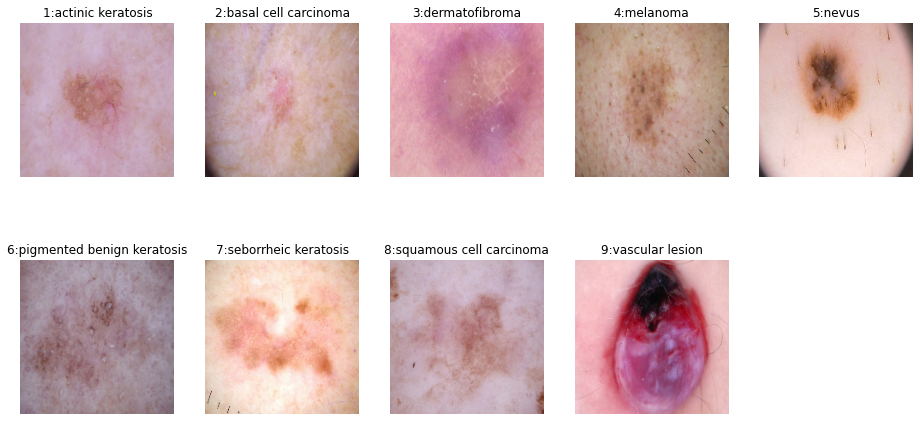

In [14]:
#Display one image from each of the classes
plt.figure(figsize=(16, 8))

for i in range(num_classes):
    class_ds = train_ds.filter(lambda _, l: tf.math.equal(l[0], i))
    ax = plt.subplot(2, 5, i+1)
    
    for image, label in class_ds.take(1):    
        plt.imshow(image[0].numpy().astype('uint8'))
        
        l = label.numpy()[0]
        title_str = str (l+1) + ':' + class_names[l]
        plt.title(title_str)
        
        plt.axis('off')

#### <font color=blue> Step 5: </font> Visualize Class imbalance

In [15]:
#Count the number of images in each class
counts = []
for c in class_names:
    class_dir  = pathlib.Path(train_path + '/' + c)
    class_count = len(list(class_dir.glob('*.jpg')))
    counts.append (class_count)

In [16]:
#Convert the counts to % value
counts = np.array (counts) * 100 / np.sum (counts)

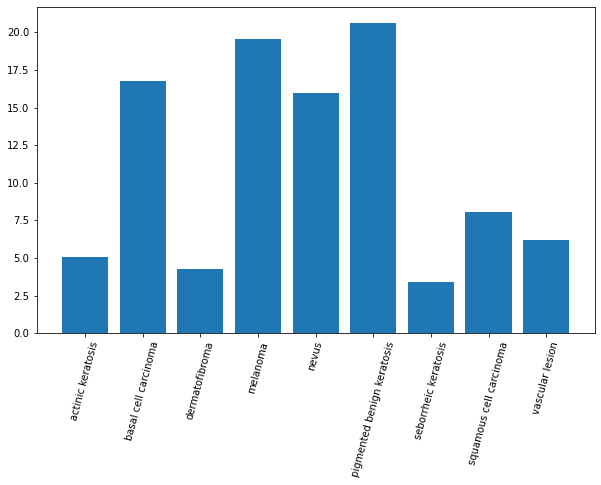

In [17]:
#Display % of data from each class
plt.figure(figsize=(10, 6))

plt.bar (class_names, counts)
plt.xticks (rotation=75)
plt.show()

#### <font color=blue> Step 6: </font> Build CNN Model

<font color=blue> Notes: </font>
- The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

- Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

- Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<font color=blue> Instructions: </font>
- Create the model
- Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. 
- Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). 
- The RGB channel values are in the [0, 255] range. 
- This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

##### <font color=blue> Import Keras libraries for CNN Model building

In [19]:
from keras import layers
from keras.models import Sequential, Model, load_model

In [20]:
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Input, Add,Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import L2

##### <font color=blue> Define a function to visualize model results

In [21]:
def visualize_results (history, epochs):
    epochs_range = range(epochs)
    plt.figure(figsize=(16, 8))

    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc,      label='Training Accuracy')
    plt.plot(epochs_range, val_acc,  label='Validation Accuracy')
    plt.xlabel ('Epoch')
    plt.ylabel ('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss,     label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel ('Epoch')
    plt.ylabel ('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

In [33]:
#define a function to build the model
def get_model (bn=False, dropout=False, lc2=False):
    model = Sequential()
    model.add(Rescaling(1.0/255, input_shape=(180,180,3)))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (180,180,3)))
    if bn: model.add(BatchNormalization());
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    if bn: model.add(BatchNormalization());
    model.add(MaxPooling2D(pool_size=(2,2)))
    if dropout: model.add(Dropout(0.25))

    model.add(Conv2D(filters =128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    if bn: model.add(BatchNormalization());
    model.add(Conv2D(filters =128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    if bn: model.add(BatchNormalization());
    model.add(MaxPooling2D(pool_size=(2,2)))
    if dropout: model.add(Dropout(0.25))

    model.add(Flatten())
    if lc2:
        model.add(Dense(512, kernel_regularizer=L2(0.01)))
    else:
        model.add(Dense(512))
    model.add(Activation('relu'))
    if dropout: model.add(Dropout(0.50))
    model.add(Dense(num_classes, activation = "softmax"))
    
    return model

##### <font color=blue> Model 1: </font> 4 Conv layers, 2 Maxpool, 1 Dense, 1 Output-Softmax Layer

In [34]:
#Build the model
model = get_model()

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

In [ ]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [ ]:
#Visualize the model results
visualize_results (history, epochs)

##### <font color=blue> Model 2: </font> Added Batch Normalization after each Conv layer

In [ ]:
#Build the model
model = get_model(bn=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

In [ ]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [ ]:
#Visualize the model results
visualize_results (history, epochs)

##### <font color=blue> Model 3: </font> Add Dropouts - to remove overfitting

In [ ]:
#Build the model
model = get_model(bn=True, dropout=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

In [ ]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [ ]:
#Visualize the model results
visualize_results (history, epochs)

##### <font color=blue> Model 4: </font> Add LC2 regularizer

In [ ]:
#Build the model
model = get_model(bn=True, dropout=True, lc2=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

In [ ]:
#Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [ ]:
#Visualize the model results
visualize_results (history, epochs)

<font color=blue> Instructions: </font>
- Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Write your findings here

- Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
- Your code goes here
- Todo, visualize how your augmentation strategy works for one instance of training image.
- Your code goes here

<font color=blue> Todo: </font> Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
Todo: Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

##### <font color=blue> Model 5: </font> Using Augmentor to create an enhanced dataset

In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor

In [ ]:
#Removing output folders from previous execution 
for c in class_names:
    f = train_path + '/' + c + '/output' 
    if os.path.exists(f):
        print ('Dir ' + f + ' exists from previous program execution. Removing the same')
        for root, dirs, files in os.walk(f, topdown=False):
            for name in files:
                os.remove(os.path.join(root, name))
            for name in dirs:
                os.rmdir(os.path.join(root, name))
    else:
        print ('Dir ' + f + ' does not exist from previous program execution.')

<font color=blue> Note: </font> 
To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [ ]:
for i in class_names:
    p = Augmentor.Pipeline(train_path + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

<font color=blue> Note: </font> 
Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

<font color=blue> Note: </font> 
Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
counts = []
for c in class_names:
    class_dir1  = pathlib.Path(train_path + '/' + c)
    class_dir2  = pathlib.Path(train_path + '/' + c + '/output')
    class_count = len(list(class_dir1.glob('*.jpg'))) + len(list(class_dir2.glob('*.jpg')))
    counts.append (class_count)

In [ ]:
counts = np.array (counts) * 100 / np.sum (counts)

In [ ]:
#Display % of data from each class
plt.figure(figsize=(10, 6))

plt.bar (class_names, counts)
plt.xticks (rotation=75)
plt.show()

<font color=blue> Instructions: </font>
So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

Todo: Train the model on the data created using Augmentor

In [ ]:
#Creating Training Dataset - 80% of the images used for training
train_ds_aug = image_dataset_from_directory(
    train_dir,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
#Creating Validation Dataset - 20% of the images used for validation
val_ds_aug = image_dataset_from_directory(
    train_dir,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
#Build the model
model = get_model(bn=True, dropout=True, lc2=True)

#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#View Model Summary
model.summary()

In [ ]:
#Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [ ]:
#Visualize the model results
visualize_results (history, epochs)

##### <font color=blue> Model 6: </font> Increase epochs to 50

In [ ]:
#Train the model
epochs = 50
history = model.fit(train_ds_aug, validation_data=val_ds_aug, epochs=epochs, batch_size=batch_size)

In [ ]:
#Visualize the model results
visualize_results (history, epochs)

#### <font color=blue> Step 6: </font> Evaluate the model on the test dataset

In [ ]:
#Creating Validation Dataset - 20% of the images used for validation
eval_ds = image_dataset_from_directory(
    test_dir,
    labels      ='inferred',
    label_mode  = "binary",
    class_names = class_names,
    color_mode  =  'rgb',
    batch_size  = batch_size, # not really applicable as I want to use the whole set?
    image_size  = (img_height, img_width),
    shuffle     = True,
    seed        = 123,
    validation_split = None
)

In [ ]:
test_loss, test_acc = model.evaluate (test_images, verbose=2)
print('\nTest accuracy:', test_acc)